# Computer Vision - OCR Parsing example

###### Links: [Apple Financial Statement (2021)](https://s2.q4cdn.com/470004039/files/doc_financials/2021/q4/_10-K-2021-(As-Filed).pdf)  |  [Article ()]()

### 0 - Setup

###### Import pckgs

In [19]:
import warnings
warnings.filterwarnings("ignore")

## for data
import os
import numpy as np
from PyPDF2 import PdfReader
import pdf2image

## for plotting
import matplotlib.pyplot as plt

## for ocr
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "c:/profili/U382270/Downloads/my/OCR/tesseract.exe"

###### Import data

In [2]:
#As Text
doc = PdfReader("doc_apple.pdf")
len(doc.pages)

82

In [3]:
print(doc.pages[0].extract_text())

 UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K
(Mark One)
☒    ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the fiscal year ended September 25, 2021
or
☐    TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from              to             .
Commission File Number: 001-36743

Apple Inc.
(Exact name of Registrant as specified in its charter)
California 94-2404110
(State or other jurisdiction
of incorporation or organization) (I.R.S. Employer Identification No.)
One Apple Park Way
Cupertino, California 95014
(Address of principal executive offices) (Zip Code)
(408) 996-1010
(Registrant’s telephone number, including area code)
Securities registered pursuant to Section 12(b) of the Act:
Title of each classTrading 
symbol(s)Name of each exchange on which registered
Common Stock, $0.00001 par value per shareAAPLThe Nasdaq Stock Market LLC
1.000% Not

In [5]:
# As Image
doc = pdf2image.convert_from_path("doc_apple.pdf", dpi=300)
len(doc)

82

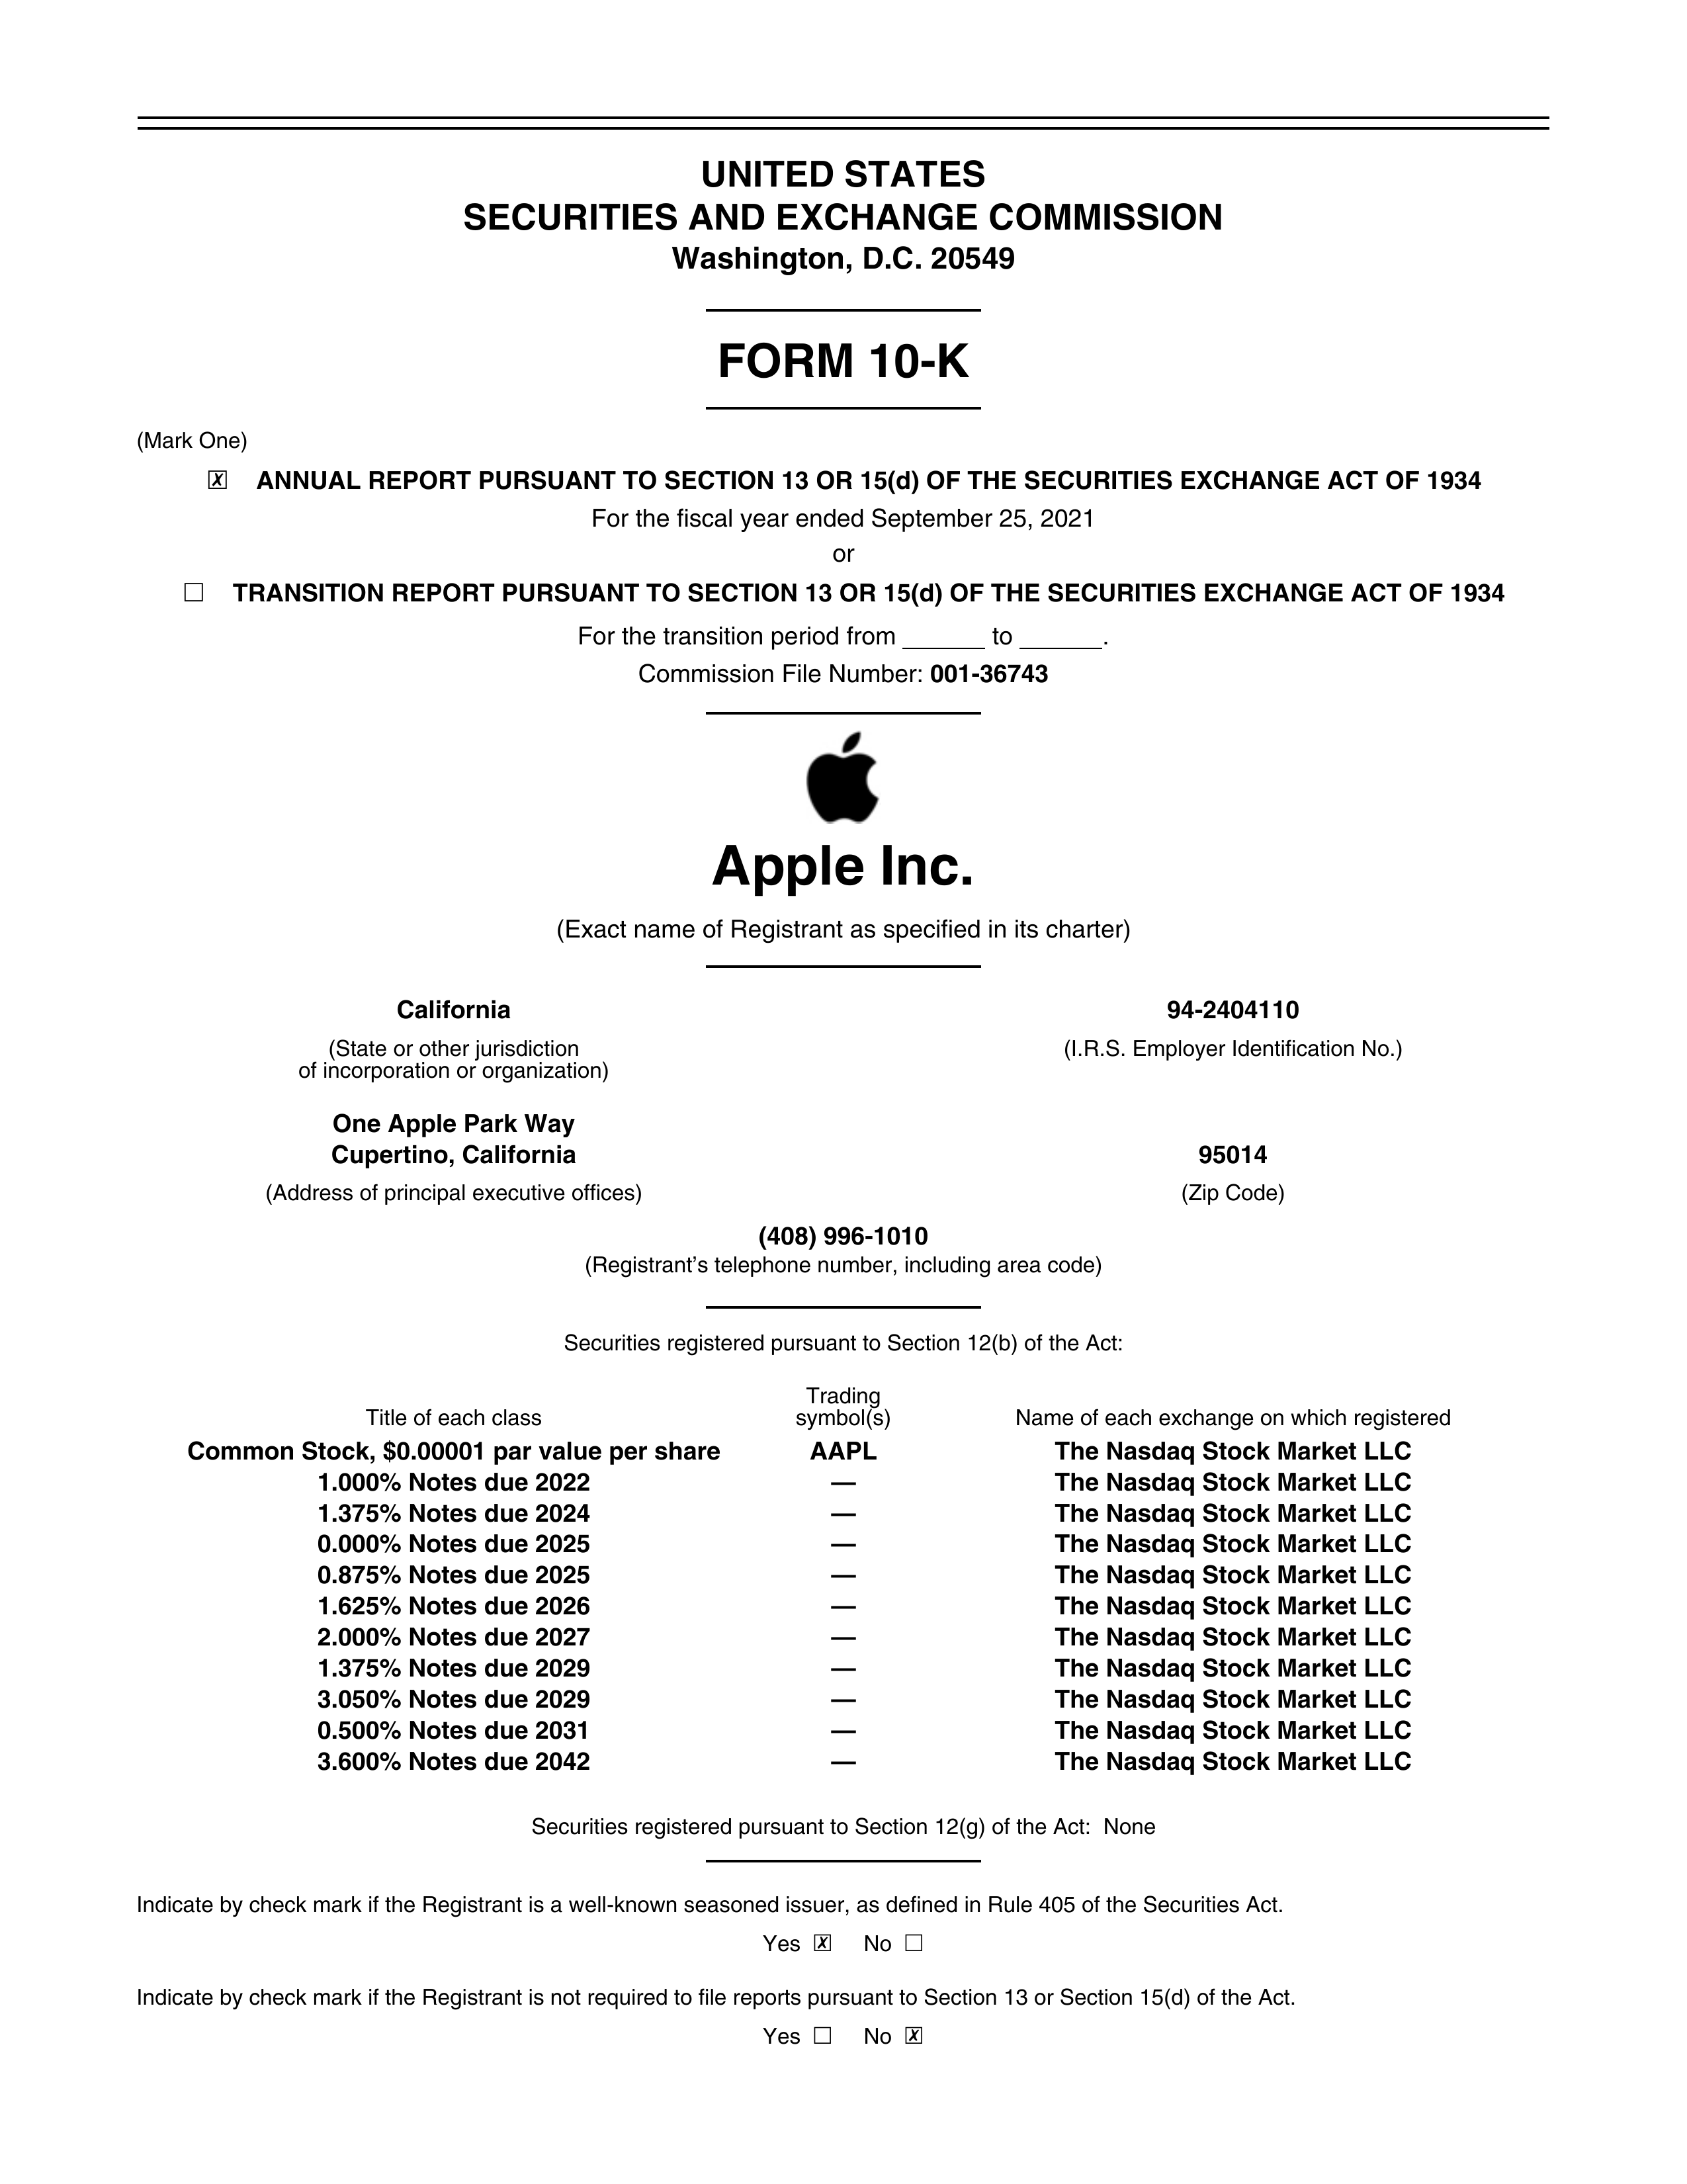

In [6]:
doc[0]

In [7]:
# Save imgs
folder = "doc"
if folder not in os.listdir():
    os.makedirs(folder)

i = 1
for page in doc:
    image_name = "page_"+str(i)+".jpg"  
    #page.save(os.path.join(folder, image_name), "JPEG")
    i = i+1

### 1 - Preprocessing

###### Segmentation

In [42]:
# convert to array
img = np.asarray(doc[0])

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 30)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(thresh, kernel, iterations=4)
contours = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

coordinates = []
for c in contours:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)

    if y >= 600 and x <= 1000:
        if area > 10000:
            img = cv2.rectangle(img, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
            coordinates.append([(x,y), (2200, y+h)])

    if y >= 2400 and x<= 2000:
        img = cv2.rectangle(img, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
        coordinates.append([(x,y), (2200, y+h)])

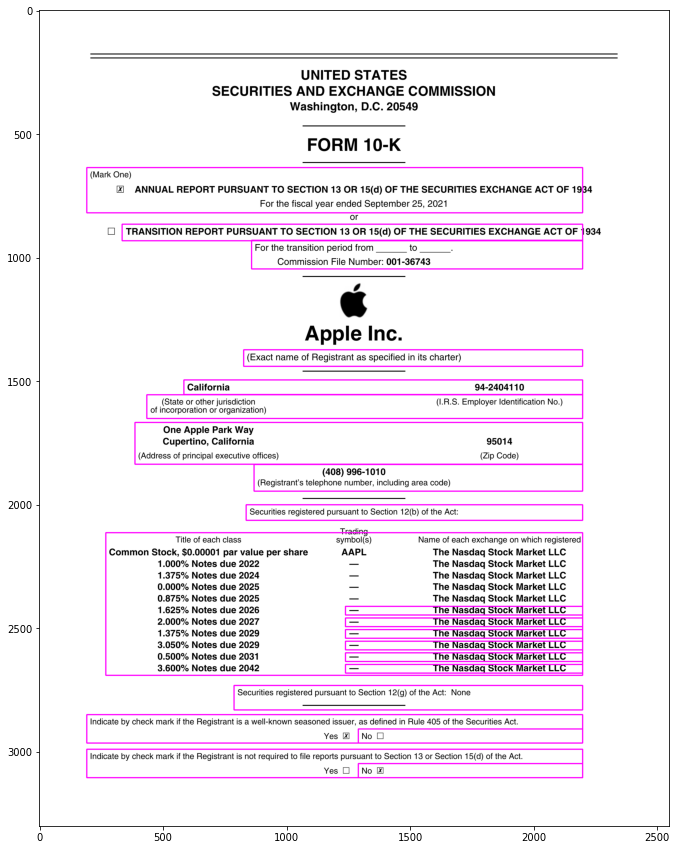

In [44]:
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.show()

### 2 - Search

- Text
- Images
- Tables

In [30]:
print(pytesseract.image_to_string(doc[0]))

UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549

FORM 10-K

(Mark One)
Xx] ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the fiscal year ended September 25, 2021
or
TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from to
Commission File Number: 001-36743

4

Apple Inc.

(Exact name of Registrant as specified in its charter)

California 94-2404110
(State or other jurisdiction (I.R.S. Employer Identification No.)
of incorporation or organization)

One Apple Park Way
Cupertino, California 95014

(Address of principal executive offices) (Zip Code)

(408) 996-1010
(Registrant's telephone number, including area code)

Securities registered pursuant to Section 12(b) of the Act:

Trading
Title of each class symbol(s) Name of each exchange on which registered
Common Stock, $0.00001 par value per share AAPL The Nasdaq Stock Market LLC
1.000% Notes due 2022 _ The N

### 3 - Extraction

In [3]:
import layoutparser as lp
import pdf2image

In [4]:
doc = pdf2image.convert_from_path("doc_apple.pdf", dpi=300)

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?